In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from selfpeptide.utils.model_utils import *
from selfpeptide.utils.data_utils import split_pretokenized_data, load_immunogenicity_dataframes

In [2]:
binding_model = load_binding_model("/home/gvisona/Projects/SelfPeptides/trained_models/binding_model")

In [3]:
binding_model.eval()

Peptide_HLA_BindingClassifier(
  (aa_sequence_embedder): PeptideEmbedder(
    (tokenizer): AA_Tokenizer()
    (aa_embs): Embedding(23, 512, padding_idx=22)
    (transformer_encoder): TransformerEncoder(
      (pos_encoding): PositionalEncoding(
        (dropout): Dropout(p=0.05, inplace=False)
      )
      (dropout): Dropout(p=0.05, inplace=False)
      (encoder_layers): ModuleList(
        (0-1): 2 x TEncoderLayer(
          (multihead_attention): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=512, out_features=512, bias=True)
          )
          (dropout1): Dropout(p=0.05, inplace=False)
          (res_norm1): ResNorm(
            (norm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
          )
          (feed_forward): Sequential(
            (0): Linear(in_features=512, out_features=512, bias=True)
            (1): ReLU()
            (2): Linear(in_features=512, out_features=512, bias=True)
          )
          (dropout2): Dropo

In [4]:
binding_model(['TETDLTKGPHEF'], ['YYTKYREISTNTYENTAYIRYDDYTWAVDAYLSY'])

(tensor([[9.9892]], grad_fn=<AddmmBackward0>),
 [tensor([[-4.9154e-01,  1.2885e+00,  1.4339e-01,  2.3332e+00, -5.4178e-01,
           -1.0350e+00, -7.9599e-01, -8.8218e-01, -6.4035e-01, -6.0727e-02,
           -8.8719e-01, -5.2154e-01, -4.2804e-02, -2.0904e+00,  5.9632e-01,
            1.0007e+00,  1.1476e+00,  6.8663e-01, -1.1411e+00, -8.3022e-01,
           -8.5971e-01, -1.3710e-01, -2.7216e-01, -3.3085e-01,  2.1354e+00,
           -9.7303e-01,  9.9159e-01, -1.4487e+00, -3.7764e-01,  4.2450e-01,
            9.6699e-01,  1.2988e+00,  2.0642e-01,  2.6071e-01, -2.4152e+00,
            6.1587e-01,  1.4791e-01, -4.4742e-01, -4.1757e-01, -3.9798e-01,
           -7.2468e-01, -2.0384e-01,  1.5059e+00, -1.6984e+00,  6.8932e-01,
           -5.6078e-01, -4.8339e-01, -8.9231e-01,  1.2977e+00,  1.3970e-02,
           -8.6567e-01,  2.1694e-01,  2.6581e-02,  8.9659e-01,  4.7396e-01,
            7.8726e-01, -1.2580e+00, -7.2972e-01, -1.6778e-01, -1.7894e-02,
           -4.9493e-01,  1.2725e+00,  5.0

In [5]:
sns_model = load_sns_model("/home/gvisona/Projects/SelfPeptides/trained_models/sns_model")

In [6]:
sns_model.human_peptides_cosine_centroid

tensor([ 0.1465,  0.0189,  0.1064,  0.0726, -0.0473,  0.2315,  0.1207,  0.0298,
        -0.0280,  0.0250,  0.0834,  0.0055,  0.0165, -0.2945,  0.1735, -0.3534,
        -0.1394,  0.0271, -0.1575,  0.0016, -0.1854, -0.1119, -0.0353,  0.2160,
         0.5873, -0.1008, -0.0287, -0.0102,  0.1192, -0.0121, -0.0447, -0.3575])

In [7]:
val_set, test_set, ref_set, train_set = split_pretokenized_data("../processed_data/Self_nonSelf/pre_tokenized_peptides_dataset.hdf5",
                                                                    holdout_sizes=[
                                                                        10000, 10000, 10000],
                                                                    random_state=3, test_run=True)

LOADING TEST RUN DATA: REMOVE FLAG IF TRAINING ACTUAL MODEL
Loading data
Shuffling data
Splitting data


100%|██████████████████████████████████████████| 3/3 [00:00<00:00, 35246.25it/s]


In [8]:
train_set

(array([[ 0, 12, 15, ..., 22, 22, 22],
        [13,  0, 13, ...,  0, 12,  9],
        [13,  2,  5, ..., 22, 22, 22],
        ...,
        [ 6,  5, 14, ..., 10,  7, 22],
        [ 9, 17,  4, ...,  9, 22, 22],
        [15,  5,  3, ...,  2,  1, 22]], dtype=uint8),
 array([[ 0,  0, 12, ...,  9,  9,  6],
        [ 9,  5,  5, ...,  5,  3, 22],
        [ 5,  3, 13, ...,  0, 11, 17],
        ...,
        [ 4,  9,  9, ..., 22, 22, 22],
        [ 5, 15, 16, ..., 22, 22, 22],
        [ 7,  0, 15, ..., 22, 22, 22]], dtype=uint8))

In [9]:
test_set[0]

array([[ 9, 14,  6, ...,  9, 13, 22],
       [15, 14,  3, ...,  1, 22, 22],
       [13, 14, 14, ..., 11, 14,  2],
       ...,
       [ 3,  5,  8, ...,  8, 10, 22],
       [ 8, 10,  2, ..., 22, 22, 22],
       [12,  7, 14, ..., 12,  2, 22]], dtype=uint8)

In [10]:
self_projections, self_embeddings, self_sns_scores = sns_model(torch.LongTensor(test_set[0]), return_sns_score=True)

In [11]:
nonself_projections, nonself_embeddings, nonself_sns_scores = sns_model(torch.LongTensor(test_set[1]), return_sns_score=True)

In [12]:
self_sns_scores

tensor([[0.5119],
        [0.8770],
        [0.9974],
        ...,
        [0.8192],
        [0.9930],
        [0.9954]], grad_fn=<MmBackward0>)

In [13]:
nonself_sns_scores

tensor([[-0.9785],
        [-0.1424],
        [-0.7263],
        ...,
        [-0.9902],
        [-0.9293],
        [ 0.9909]], grad_fn=<MmBackward0>)

In [14]:
df1 = pd.DataFrame({"Category": ["self"]*len(self_sns_scores), "Value": self_sns_scores.detach().numpy().flatten()})
df2 = pd.DataFrame({"Category": ["non_self"]*len(nonself_sns_scores), "Value": nonself_sns_scores.detach().numpy().flatten()})
df = pd.concat([df1, df2])
df

,Category,Value
0,self,0.511922
1,self,0.876999
2,self,0.997370
3,self,0.839703
4,self,0.667494
...,...,...
4995,non_self,-0.867810
4996,non_self,-0.540369
4997,non_self,-0.990232
4998,non_self,-0.929270


<Axes: xlabel='Category', ylabel='Value'>

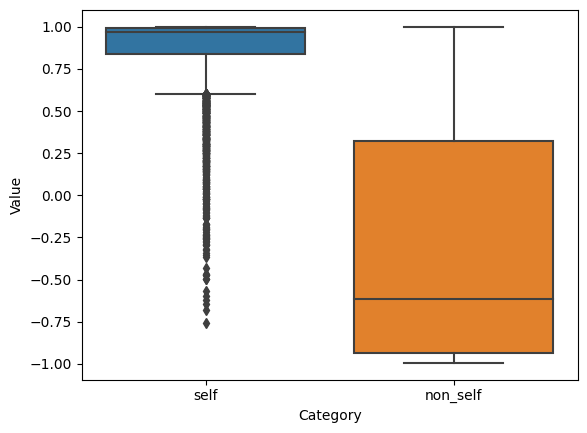

In [15]:
sns.boxplot(df, x="Category", y="Value") 

In [16]:
config = {"immunogenicity_df": "/home/gvisona/Projects/SelfPeptides/processed_data/Immunogenicity/Processed_TCell_IEDB_Beta_noPrior.csv",
          "pseudo_seq_file": "/home/gvisona/Projects/SelfPeptides/data/NetMHCpan_pseudoseq/MHC_pseudo.dat",
          "dhlap_df": "/home/gvisona/Projects/SelfPeptides/processed_data/Immunogenicity/DHLAP_immunogenicity_data.csv",
          "seed": 0,
          "hla_filter": None,
          "beta_prior": "uniform"
}

In [17]:
train_df, val_df, test_df, dhlap_imm_df = load_immunogenicity_dataframes(config)


Applying chosen prior..


100%|███████████████████████████████████| 30125/30125 [00:04<00:00, 6289.09it/s]


IEDB N. training samples: 23062
IEDB N. val samples: 2555
IEDB N. test samples: 4508


In [18]:
train_df

,Peptide,HLA,Qualitative Measurement,Number of Subjects Tested,Number of Subjects Positive,Peptide length,Alpha,Beta,Distr. Mean,Distr. Variance,Allele Pseudo-sequence,Target,Sample,Peptide Length,Obs. Mean,Obs. Variance,Stratification_index
71,KQISNELNY,HLA-B15:01,Positive,61.0,1.0,9,2.0,61.0,0.031746,0.000480,YYAMYREISTNTYESNLYLRYDSYTWAEWAYLWY,1,KQISNELNY_HLA-B15:01,9,0.031746,0.000480,HLA-B15:01_1
23603,RYIVDKNVI,HLA-A24:07,Negative,1.0,0.0,9,1.0,2.0,0.333333,0.055556,YSAMYEEKVAQTDENIAYLMFHYYTWAVQAYTGY,0,RYIVDKNVI_HLA-A24:07,9,0.333333,0.055556,HLA-A24:07_0
8083,GSQVYHDIY,HLA-A01:01,Negative,4.0,0.0,9,1.0,5.0,0.166667,0.019841,YFAMYQENMAHTDANTLYIIYRDYTWVARVYRGY,0,GSQVYHDIY_HLA-A01:01,9,0.166667,0.019841,HLA-A01:01_0
19680,FGDSKEPVPY,HLA-A01:01,Positive,1.0,1.0,10,2.0,1.0,0.666667,0.055556,YFAMYQENMAHTDANTLYIIYRDYTWVARVYRGY,1,FGDSKEPVPY_HLA-A01:01,10,0.666667,0.055556,HLA-A01:01_1
8258,KESLPMLYF,HLA-B44:02,Negative,4.0,0.0,9,1.0,5.0,0.166667,0.019841,YYTKYREISTNTYENTAYIRYDDYTWAVDAYLSY,0,KESLPMLYF_HLA-B44:02,9,0.166667,0.019841,HLA-B44:02_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28593,RPSPIGYLGL,HLA-B07:06,Positive-High,1.0,1.0,10,2.0,1.0,0.666667,0.055556,YYSEYRNIYAQTDESNLYLSYNYYTWAERAYEWY,1,RPSPIGYLGL_HLA-B07:06,10,0.666667,0.055556,HLA-B07:06_1
28911,RYYDGNIYEL,HLA-A24:07,Positive,1.0,1.0,10,2.0,1.0,0.666667,0.055556,YSAMYEEKVAQTDENIAYLMFHYYTWAVQAYTGY,1,RYYDGNIYEL_HLA-A24:07,10,0.666667,0.055556,HLA-A24:07_1
29098,VRMVMMTHF,HLA-B27:01,Negative,1.0,0.0,9,1.0,2.0,0.333333,0.055556,YHTEYREICAKTYENTAYLNYHDYTWAVLAYEWY,0,VRMVMMTHF_HLA-B27:01,9,0.333333,0.055556,HLA-B27:01_0
29264,ILKEPVHGVY,HLA-B15:10,Positive,1.0,1.0,10,2.0,1.0,0.666667,0.055556,YYSEYRNICTNTYESNLYLRYDYYTWAELAYLWY,1,ILKEPVHGVY_HLA-B15:10,10,0.666667,0.055556,HLA-B15:10_1


In [19]:
from torch.utils.data import Dataset

class BetaDistributionDataset(Dataset):
    def __init__(self, df, hla_repr="Allele Pseudo-sequence"):
        super().__init__()
        cols = ["Peptide", hla_repr, 
                "Alpha", "Beta", "Target"]
        self.data_matrix = df[cols].values.tolist()
        
    def __len__(self):
        return len(self.data_matrix)
    
    def __getitem__(self, ix):
        return self.data_matrix[ix]

In [20]:
dset = BetaDistributionDataset(val_df)

In [21]:
val_df = val_df.reset_index(drop=True)

In [22]:
data = val_df["Peptide"].values.tolist()

In [23]:
val_projections, val_embeddings, val_sns_scores = sns_model(data, return_sns_score=True)

In [24]:
val_sns_scores.detach().numpy().flatten()

array([-0.5231042 ,  0.64738286, -0.54347646, ..., -0.47414976,
        0.44687778, -0.97926563], dtype=float32)

In [25]:
val_df["SNS_score"] = val_sns_scores.detach().numpy().flatten()

In [26]:
val_df

,Peptide,HLA,Qualitative Measurement,Number of Subjects Tested,Number of Subjects Positive,Peptide length,Alpha,Beta,Distr. Mean,Distr. Variance,Allele Pseudo-sequence,Target,Sample,Peptide Length,Obs. Mean,Obs. Variance,Stratification_index,SNS_score
0,VETITEKTF,HLA-B40:02,Negative,2.0,0.0,9,1.0,3.0,0.250000,0.037500,YHTKYREISTNTYESNLYLSYNYYTWAVLAYEWY,0,VETITEKTF_HLA-B40:02,9,0.250000,0.037500,HLA-B40:02_0,-0.523104
1,FIHLQLYSL,HLA-A02:01,Negative,10.0,0.0,9,1.0,11.0,0.083333,0.005876,YFAMYGEKVAHTHVDTLYVRYHYYTWAVLAYTWY,0,FIHLQLYSL_HLA-A02:01,9,0.083333,0.005876,HLA-A02:01_0,0.647383
2,SVTKESHQIK,HLA-A11:01,Negative,2.0,0.0,10,1.0,3.0,0.250000,0.037500,YYAMYQENVAQTDVDTLYIIYRDYTWAAQAYRWY,0,SVTKESHQIK_HLA-A11:01,10,0.250000,0.037500,HLA-A11:01_0,-0.543476
3,KPYNVNNLSV,HLA-B51:01,Negative,1.0,0.0,10,1.0,2.0,0.333333,0.055556,YYATYRNIFTNTYENIAYWTYNYYTWAELAYLWH,0,KPYNVNNLSV_HLA-B51:01,10,0.333333,0.055556,HLA-B51:01_0,0.272838
4,RYFTSYKRF,HLA-A24:02,Negative,5.0,0.0,9,1.0,6.0,0.142857,0.015306,YSAMYEEKVAHTDENIAYLMFHYYTWAVQAYTGY,0,RYFTSYKRF_HLA-A24:02,9,0.142857,0.015306,HLA-A24:02_0,-0.887028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2550,APNPNRFVI,HLA-B53:01,Negative,2.0,0.0,9,1.0,3.0,0.250000,0.037500,YYATYRNIFTNTYENIAYIRYDSYTWAVLAYLWY,0,APNPNRFVI_HLA-B53:01,9,0.250000,0.037500,HLA-B53:01_0,0.102403
2551,TEFHHYNNFY,HLA-B49:01,Negative,1.0,0.0,10,1.0,2.0,0.333333,0.055556,YHTKYREISTNTYENIAYWRYNLYTWAELAYLWY,0,TEFHHYNNFY_HLA-B49:01,10,0.333333,0.055556,HLA-B49:01_0,-0.347740
2552,LPFNDGVYF,HLA-B35:01,Negative,8.0,0.0,9,1.0,9.0,0.100000,0.008182,YYATYRNIFTNTYESNLYIRYDSYTWAVLAYLWY,0,LPFNDGVYF_HLA-B35:01,9,0.100000,0.008182,HLA-B35:01_0,-0.474150
2553,WEMISSRRY,HLA-B49:01,Negative,1.0,0.0,9,1.0,2.0,0.333333,0.055556,YHTKYREISTNTYENIAYWRYNLYTWAELAYLWY,0,WEMISSRRY_HLA-B49:01,9,0.333333,0.055556,HLA-B49:01_0,0.446878


<Axes: xlabel='Target', ylabel='SNS_score'>

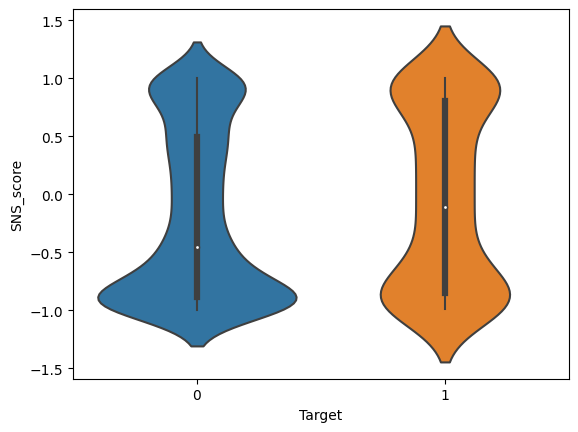

In [27]:
sns.violinplot(val_df, x="Target", y="SNS_score")

In [28]:
import torch.nn as nn
from selfpeptide.utils.function_utils import get_alpha, get_beta, beta_distr_mean
from selfpeptide.utils.training_utils import beta_kl_divergence

class CustomKL_Loss(nn.Module):
    def __init__(self, config, class_weights=[1.0, 1.0], device="cpu"):
        super().__init__()

        self.regression_loss = config.get("regression_loss", "none")
        self.regression_weight = config.get("regression_weight", 1.0)
        
        self.kl_weight = config.get("kl_weight", 1.0)
        self.kl_loss_type = config.get("kl_loss_type", "forward")
        self.class_weights = torch.tensor(class_weights).to(device)
        self.device = device
        

    def forward(self, predictions, alphas, betas, class_targets):
        loss = 0
        logs = {}
        
        means = predictions[:,0]
        variances = predictions[:, 1]
        
        pred_alphas = get_alpha(means, variances)
        pred_betas = get_beta(means, pred_alphas)
        
        obs_means = beta_distr_mean(alphas, betas)
        weights = torch.gather(self.class_weights, 0, class_targets.long())
        
        if self.regression_loss=="L1":
            reg_loss = torch.abs(obs_means - means)
            reg_loss = torch.mean(reg_loss * weights)
        elif self.regression_loss=="MSE":
            reg_loss = torch.square(obs_means - means)
            reg_loss = torch.mean(reg_loss * weights)

             
        # Beta KL divergence
        if self.kl_weight>0.0:
            kl_loss = 0
            if self.kl_loss_type == "forward" or self.kl_loss_type=="both":
                kl_loss += beta_kl_divergence(pred_alphas, pred_betas, alphas, betas)
            if self.kl_loss_type == "backward" or self.kl_loss_type=="both":
                kl_loss += beta_kl_divergence(alphas, betas, pred_alphas, pred_betas)
            if self.kl_loss_type=="both":
                kl_loss /= 2
            kl_loss = torch.mean(kl_loss * weights)
            loss += self.kl_weight * kl_loss 
            logs["KL"] = kl_loss.item()

        
        if self.regression_loss!="none":
            loss += self.regression_weight * reg_loss 
            logs[self.regression_loss] = reg_loss.item()
        
            
        logs["loss"] =  loss.item()
               
        return loss, logs

In [34]:
import torch.nn as nn
from torch.utils.data import DataLoader
from selfpeptide.model.peptide_embedder import PeptideEmbedder, SelfPeptideEmbedder_withProjHead
from selfpeptide.model.binding_affinity_classifier import Peptide_HLA_BindingClassifier

from selfpeptide.model.components import ResMLP_Network
import warnings

class ImmunogenicityClassifier(nn.Module):
    def __init__(self, config, device, epsilon=1e-3):
        super().__init__()
        self.config = config
        self.device = device
        self.epsilon = epsilon
        
        
            
        self.immunogenicity_aa_embedder = PeptideEmbedder(config, device)
        self.joint_mlp = ResMLP_Network(config, device)
        
        self.beta_regression_output_module = nn.Sequential(nn.Linear(config["output_dim"]+2, config["beta_regr_hidden_dim"]), 
                                                           nn.ReLU(),
                                                           nn.Linear(config["beta_regr_hidden_dim"], 2),
                                                           nn.Sigmoid())
            
    def forward(self, peptides, hlas, binding_peptides_embs, binding_hlas_embs, sns_peptides_embs, binding_score, sns_scores, *args):
        peptide_imm_embs = self.immunogenicity_aa_embedder(peptides)
        hla_imm_embs = self.immunogenicity_aa_embedder(hlas)
        mlp_input = torch.cat([binding_peptides_embs, binding_hlas_embs, 
                               sns_peptides_embs, peptide_imm_embs, 
                               hla_imm_embs], dim=1)
        
        mlp_output = self.joint_mlp(mlp_input)
        beta_regr_input = torch.cat([binding_score, sns_scores, mlp_output], dim=1)
        beta_output = self.beta_regression_output_module(beta_regr_input)
        X_out = torch.zeros_like(beta_output, device=self.device)
        beta_mean = self.epsilon + (1-2*self.epsilon) * beta_output[:, 0]
        X_out[:, 0] = beta_mean
        X_out[:, 1] = self.epsilon + (1-2*self.epsilon) * (beta_output[:, 1]/3) * beta_mean * (1-beta_mean)
        return X_out
    
    
    
class JointPeptidesNetwork(nn.Module):
    def __init__(self, imm_config, binding_config, sns_config, binding_checkpoint=None, sns_checkpoint=None, device="cpu"):
        super().__init__()
        if not isinstance(binding_config, dict):
            with open(binding_config, "r") as f:
                binding_config = json.load(f)
        binding_config["pretrained_aa_embeddings"] = "none"
        
        if not isinstance(sns_config, dict):
            with open(sns_config, "r") as f:
                sns_config = json.load(f)
        sns_config["pretrained_aa_embeddings"] = "none"
        
        self.binding_model = Peptide_HLA_BindingClassifier(binding_config, device=device) 
        if binding_checkpoint is not None:
            self.binding_model.load_state_dict(torch.load(binding_checkpoint, map_location=device))
        else:
            warnings.warn("Binding model not initialized")
        self.binding_model.eval()
        
        self.sns_model = SelfPeptideEmbedder_withProjHead(sns_config, device=device)
        if sns_checkpoint is not None:
            self.sns_model.load_state_dict(torch.load(sns_checkpoint, map_location=device))
        else:
            warnings.warn("SnS model not initialized")
        self.sns_model.eval()
        
        # Freeze binding and SnS model
        for p in self.binding_model.parameters():
            p.requires_grad = False
        for p in self.sns_model.parameters():
            p.requires_grad = False
            
        self.immunogenicity_model = ImmunogenicityClassifier(imm_config, device=device)
    
    def forward(self, peptides, hlas, *args):
        binding_score, (binding_peptides_embs, binding_hlas_embs) = self.binding_model(peptides, hlas)
        sns_peptides_projections, sns_peptides_embs, sns_scores = self.sns_model(peptides, return_sns_score=True)
        
        output = self.immunogenicity_model(peptides, hlas, binding_peptides_embs, binding_hlas_embs, sns_peptides_embs, binding_score, sns_scores)
        return output

In [35]:
ic_config = {"PMA_ln": True,
             "PMA_num_heads": 4,
             "dropout_p": 0.05,
             "embedding_dim": 512,
             "n_attention_layers": 2,
             "transf_hidden_dim": 512,
             "num_heads": 4,
             "mlp_input_dim": 2560,
             "mlp_hidden_dim": 2048,
             "mlp_num_layers": 2,
             "output_dim": 8,
             "beta_regr_hidden_dim": 64,
             "peptide_emb_pooling": "PMA",
             "peptide_embedding_model": "AATransformerEncoder",
             "hla_repr": "Allele Pseudo-sequence",
             "hla_embedding_model": "shared",
             "hla_emb_pooling": None,
            }
device = "cpu"
# model = ImmunogenicityClassifier(ic_config, device, binding_model=binding_model, sns_model=sns_model)

In [36]:
binding_model_config = "/home/gvisona/Projects/SelfPeptides/trained_models/binding_model/config.json"
binding_model_checkpoint = "/home/gvisona/Projects/SelfPeptides/trained_models/binding_model/checkpoints/001_checkpoint.pt"
sns_model_config = "/home/gvisona/Projects/SelfPeptides/trained_models/sns_model/config.json"
sns_model_checkpoint = "/home/gvisona/Projects/SelfPeptides/trained_models/sns_model/checkpoints/001_checkpoint.pt"

model = JointPeptidesNetwork(ic_config, binding_model_config, sns_model_config, 
                             binding_checkpoint=binding_model_checkpoint, sns_checkpoint=sns_model_checkpoint,
                             device=device)

In [37]:
dloader = DataLoader(dset, batch_size=8)
batch = next(iter(dloader))

imm_alpha = batch[2]
imm_beta = batch[3]
imm_target = batch[4]


In [38]:
batch

[('VETITEKTF',
  'FIHLQLYSL',
  'SVTKESHQIK',
  'KPYNVNNLSV',
  'RYFTSYKRF',
  'REEPKISLL',
  'ISNGRHNGY',
  'VEMTEPYNL'),
 ('YHTKYREISTNTYESNLYLSYNYYTWAVLAYEWY',
  'YFAMYGEKVAHTHVDTLYVRYHYYTWAVLAYTWY',
  'YYAMYQENVAQTDVDTLYIIYRDYTWAAQAYRWY',
  'YYATYRNIFTNTYENIAYWTYNYYTWAELAYLWH',
  'YSAMYEEKVAHTDENIAYLMFHYYTWAVQAYTGY',
  'YHTKYREISTNTYESNLYLRYNYYSLAVLAYEWY',
  'YTAMYLQNVAQTDANTLYIMYRDYTWAVLAYTWY',
  'YYTKYREISTNTYENTAYIRYDDYTWAVDAYLSY'),
 tensor([1., 1., 1., 1., 1., 1., 1., 1.], dtype=torch.float64),
 tensor([ 3., 11.,  3.,  2.,  6.,  3.,  4.,  5.], dtype=torch.float64),
 tensor([0, 0, 0, 0, 0, 0, 0, 0])]

In [39]:
out = model(*batch)
out

tensor([[0.5282, 0.0326],
        [0.5830, 0.0332],
        [0.5087, 0.0326],
        [0.4664, 0.0344],
        [0.6137, 0.0317],
        [0.4910, 0.0286],
        [0.5858, 0.0316],
        [0.4996, 0.0340]], grad_fn=<CopySlices>)

In [40]:
loss_config = {
    "regression_loss": "MSE", 
}
loss = CustomKL_Loss(loss_config)

In [41]:
loss, train_loss_logs = loss(out, imm_alpha, imm_beta, imm_target)

In [42]:
loss

tensor(2.4069, dtype=torch.float64, grad_fn=<AddBackward0>)

In [43]:
loss.backward()